# Suppplementary Figure 6

**Summary:**

- **Panel a:** Strand orientation for unidentified reads.

- **Panel b:** length of 5’ soft-clips versus their alignment length.

---
<br>



## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## Settings for saving figures as pdf

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Set environmental constants

In [3]:
# Set path where files are stored
path = '/Volumes/elegans/rna_sequencing'

## Opening Dataset file

In [4]:
# Open dataset generated as part of the pre-processing step
dataset = pd.read_csv(f'{path}/dataset_+SSP+SL+HAIRPIN.tsv', sep='\t')

In [5]:
genes_start = pd.read_csv(f'{path}/start_positions_stats.tsv', sep='\t')

---

<br>

# Panel a: Strand orientation for unidentified reads

In [6]:
unidentified_reads = dataset[(dataset['ROBUST_SL_FOUND']!='FOUND') & (dataset['HAIRPIN_FOUND']!='FOUND')]

In [7]:
unidentified_reads_SSP = unidentified_reads[unidentified_reads['run'].str.contains('SSP')]

In [8]:
strand_bias = pd.DataFrame()

sense = len(unidentified_reads_SSP[unidentified_reads_SSP['read_orientation'] == 'sense'])
strand_bias.loc['UNIDENTIFIED','sense'] = sense

antisense = len(unidentified_reads_SSP[unidentified_reads_SSP['read_orientation'] == 'antisense'])
strand_bias.loc['UNIDENTIFIED','antisense'] = antisense

# Add new columns
strand_bias['total'] = strand_bias['sense'] + strand_bias['antisense']
strand_bias['%sense'] = round(strand_bias['sense'] / strand_bias['total'] * 100, 2)
strand_bias['%antisense'] = round(strand_bias['antisense'] / strand_bias['total'] * 100, 2)

# set columns type
col_types = {'sense':int, 'antisense':int, 'total':int, '%sense':float, '%antisense':float}
strand_bias = strand_bias.astype(col_types)

strand_bias

,sense,antisense,total,%sense,%antisense
UNIDENTIFIED,84012,1110211,1194223,7.03,92.97


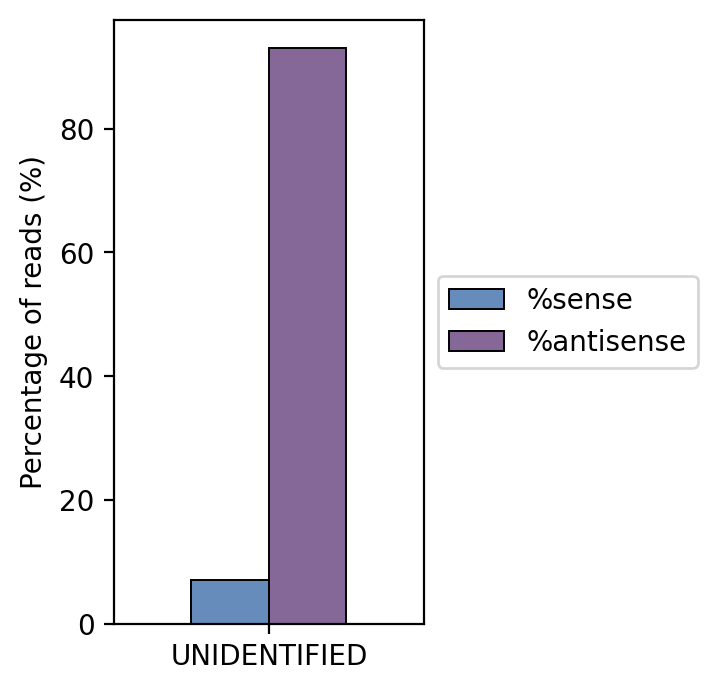

In [9]:
%matplotlib inline

plt.figure(figsize=(2,4), dpi=200)
strand_bias[['%sense','%antisense']].plot(kind='bar', stacked=False, color=['#658cbb', '#856798'], 
                                          edgecolor='k', linewidth=0.7, ax=plt.gca())

l = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('')
plt.ylabel('Percentage of reads (%)')
plt.xticks(rotation = 0)

plt.savefig('SupFig6.a-strand_bias_unidentified_reads.png', dpi=800, bbox_inches='tight')

<font size="4">**Sup. Fig 6.a:**<br></font>
Strand orientation of reads for which we could not detect a SL sequence or an endogenous hairpin.

<br>

# Panel b: length of 5’ soft-clips versus their alignment length

In [10]:
region_length = dataset[['read', 'SC5', 'alignment_length', 'ROBUST_SL_FOUND', 'HAIRPIN_FOUND','run']].copy()

# Isolate reads from SSP experiments
region_length_SSP = region_length[region_length['run'].str.contains('SSP')].copy()
# Measure size ratio
region_length_SSP['size_ratio'] = (-region_length_SSP['SC5']) / (region_length_SSP['alignment_length'])


SL = region_length_SSP[region_length_SSP['ROBUST_SL_FOUND']=='FOUND']
HAIRPIN = region_length_SSP[region_length_SSP['HAIRPIN_FOUND']=='FOUND']
UNIDENTIFIED = region_length_SSP[(region_length_SSP['ROBUST_SL_FOUND']!='FOUND') & (region_length_SSP['HAIRPIN_FOUND']!='FOUND')]

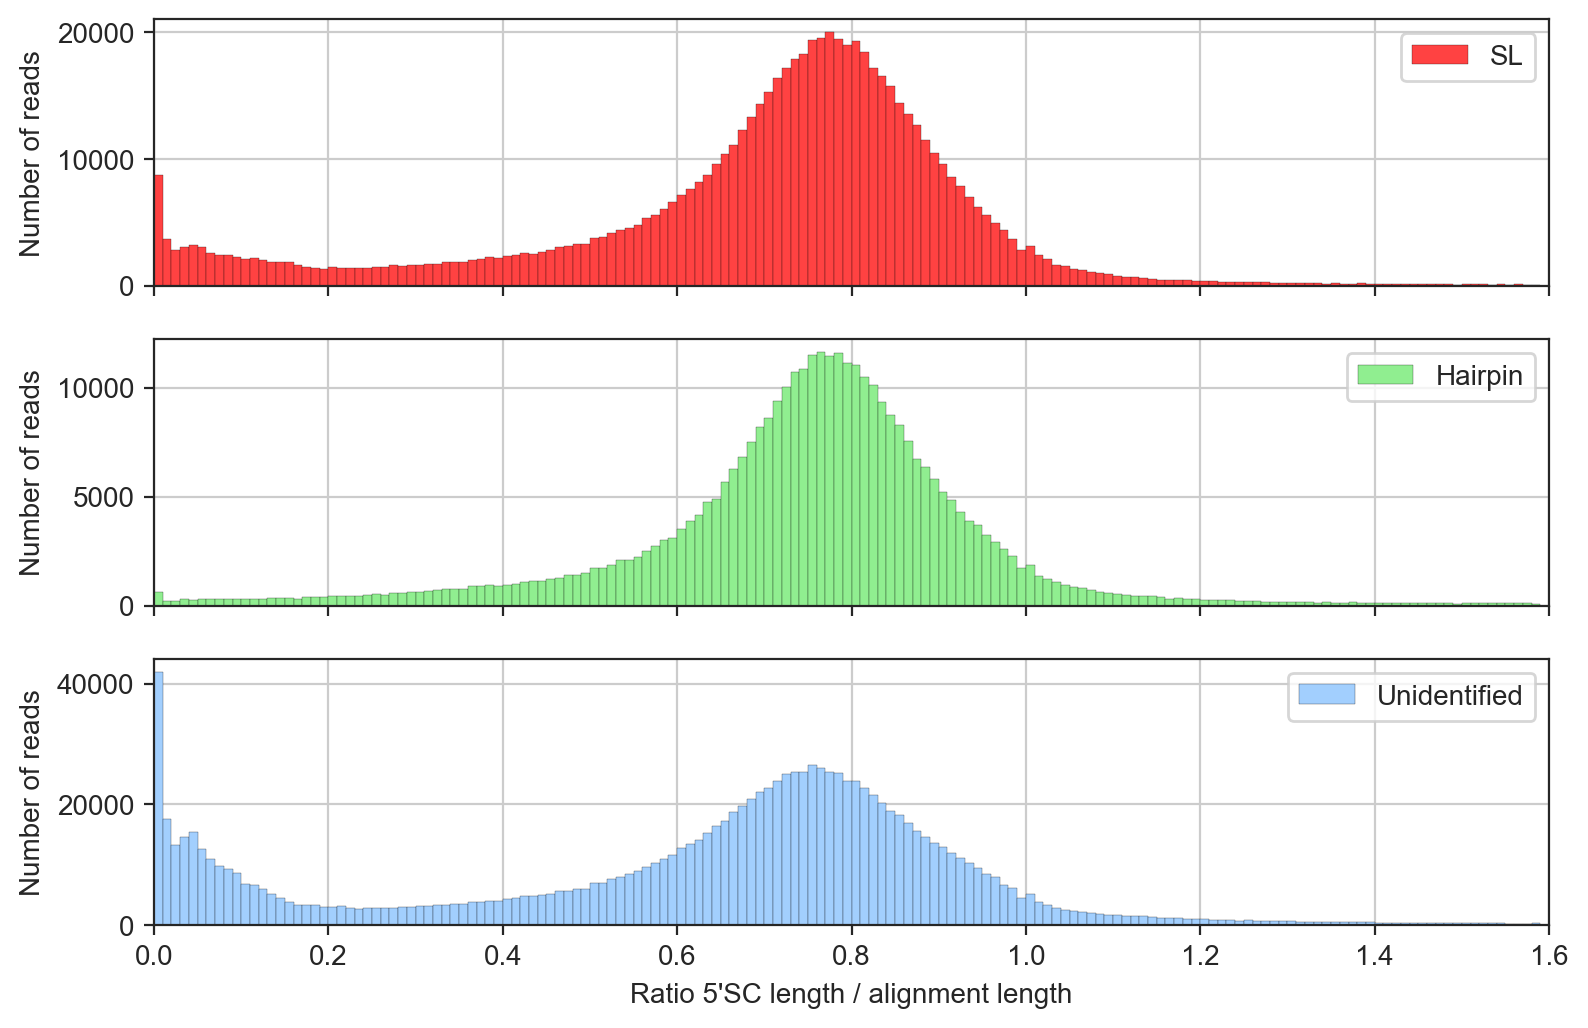

In [11]:
%matplotlib inline

sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(9, 6), ncols=1, nrows=3, sharex=True, dpi=200)

sl = SL['size_ratio'].hist(ax=ax[0], bins=[i for i in np.arange(0, 1.6, 0.01)], color='#ff4242', edgecolor='black', linewidth=0.1, label='SL', )
sl.legend()
sl.set_ylabel('Number of reads')

hairpin = HAIRPIN['size_ratio'].hist(ax=ax[1], bins=[i for i in np.arange(0, 1.6, 0.01)], color='lightgreen', edgecolor='black', linewidth=0.1, label='Hairpin',)
hairpin.legend()
hairpin.set_ylabel('Number of reads')

unidentified = UNIDENTIFIED['size_ratio'].hist(ax=ax[2], bins=[i for i in np.arange(0, 1.6, 0.01)], color='#a2cffe', edgecolor='black', linewidth=0.1, label='Unidentified',)
unidentified.legend()
unidentified.set_ylabel('Number of reads')
plt.xlabel("Ratio 5'SC length / alignment length")

plt.xlim(0, 1.6)

plt.savefig('SupFig6.b-ratio_length_5SC.png', dpi=800, bbox_inches='tight')

<font size="4">**Sup. Fig 6.b:**<br></font>
Comparison of the length of 5’ soft-clips versus the length of their alignment for reads considered SL (SL sequence found), Hairpin (Hairpin sequence found but no SL sequence ) or unidentified (no SL or hairpin sequence found)